In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import json
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

import platform
platform.system()
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


In [124]:
# 데이터 불러오기
raw_data = pd.read_csv('ambulance.csv',encoding='CP949')
data = raw_data
# print(data.shape)
# print(data.index)
# print(data.columns)
data

,지역별,구급차 소계,구급차 특수,구급차 일반,인력 소계,1급 응급구조사,2급 응급구조사,의사/간호사,인구,시/도
0,전체,7740,3427,4313,21594,7243,3721,10630,51849861,시
1,서울특별시,803,363,440,2196,803,553,840,9729107,시
2,부산광역시,432,135,297,1433,231,207,995,3413841,시
3,대구광역시,309,103,206,1004,246,165,593,2438031,시
4,인천광역시,332,127,205,1109,517,96,496,2957026,시
5,광주광역시,246,75,171,737,317,43,377,1456468,시
6,대전광역시,181,60,121,947,221,73,653,1474870,시
7,울산광역시,126,52,74,470,103,62,305,1148019,시
8,세종특별자치시,43,24,19,146,63,14,69,340575,시
9,경기도,1846,783,1063,4041,1540,363,2138,13239666,도


In [126]:
# 전체 평균, 시평균, 도평균 구하기
data_nosum = data[1:]
si_data = data_nosum[:8]
do_data = data_nosum[8:]

ambul_average = sum(data_nosum["구급차 소계"]) / sum(data_nosum["인구"])
ambul_si_average = sum(si_data["구급차 소계"]) / sum(si_data["인구"])
ambul_do_average = sum(do_data["구급차 소계"]) / sum(do_data["인구"])

medic_average = sum(data_nosum["인력 소계"]) / sum(data_nosum["인구"])
medic_si_average = sum(si_data["인력 소계"]) / sum(si_data["인구"])
medic_do_average = sum(do_data["인력 소계"]) / sum(do_data["인구"])


print("구급차의 전체평균: ", ambul_average)
print("구급차의 시평균: ", ambul_si_average)
print("구급차의 도평균: ", ambul_do_average)

print("의료인력의 전체평균: ", medic_average)
print("의료인력의 시평균: ", medic_si_average)
print("의료인력의 도평균: ", medic_do_average)

구급차의 전체평균:  0.0001492771600679894
구급차의 시평균:  0.0001076751800477543
구급차의 도평균:  0.00018233468979082183
의료인력의 전체평균:  0.0004164717047168169
의료인력의 시평균:  0.0003502927985210518
의료인력의 도평균:  0.00046905841230926676


In [127]:
ambul = pd.DataFrame({
    "지역별" : data["지역별"],
    "구급차 소계" : data["구급차 소계"],
    "구급차 특수" : data["구급차 특수"],
    "구급차 일반" : data["구급차 일반"],
    "인구별 구급차수": (data["구급차 소계"]/data["인구"]),
    "시/도": data["시/도"]
})
sorted_ambul = ambul.sort_values(['구급차 소계','구급차 특수','구급차 일반'] ,ascending = [False, False, False])
ambul_nosum = ambul[1:]

In [128]:
print(float(ambul[ambul['지역별'] == '서울특별시']["인구별 구급차수"]))
# print(ambul.loc["1"])

8.25358380784588e-05


In [129]:
medic = pd.DataFrame({
    "지역별" : data["지역별"],
    "인력 소계" : data["인력 소계"],
    "1급 응급구조사" : data["1급 응급구조사"],
    "2급 응급구조사" : data["2급 응급구조사"],
    "의사/간호사" : data["의사/간호사"],
    "인구별 의료인력수": (data["인력 소계"]/data["인구"]),
    "시/도": data["시/도"]
})
sorted_medic = medic.sort_values(['인력 소계','1급 응급구조사','2급 응급구조사',"의사/간호사"] ,ascending = [False, False, False, False])
medic_nosum = medic[1:]
# print(medic_nosum)

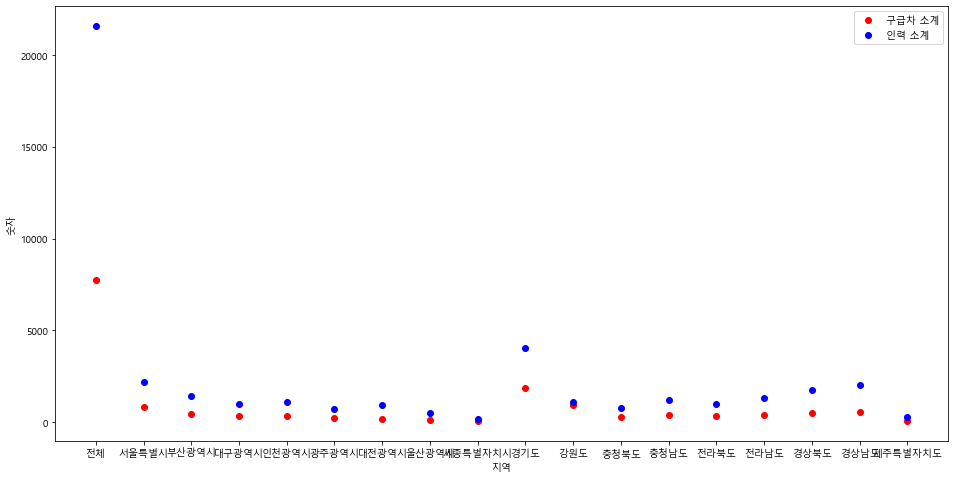

In [130]:
plt.figure(figsize=(16,8))
plt.scatter(data = ambul, x = "지역별", y = "구급차 소계", color='red')
plt.scatter(data = medic, x = "지역별", y = "인력 소계", color='blue')
plt.xlabel('지역')
plt.ylabel('숫자')
plt.legend(loc='upper right')
plt.show()

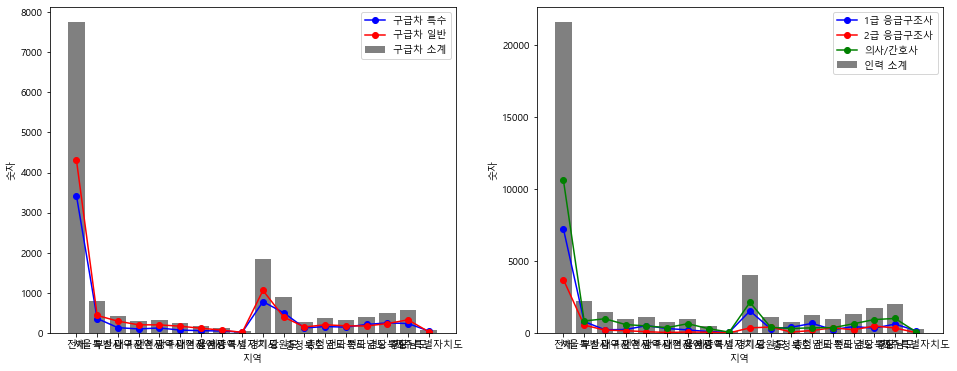

In [131]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))

axes[0].bar(x=ambul['지역별'], height=ambul['구급차 소계'], color='grey', label='구급차 소계')
axes[0].plot(ambul['지역별'], ambul['구급차 특수'], marker='o', color='blue', label='구급차 특수')
axes[0].plot(ambul['지역별'], ambul['구급차 일반'], marker='o', color='red', label='구급차 일반')
# axes[0].plot(ambul['지역별'], ambul['인구별 구급차수'], marker='o', color='yellow', label='인구별 구급차수')
axes[0].set_xlabel('지역')
axes[0].set_ylabel('숫자')
axes[0].legend(loc='upper right')

axes[1].bar(x=medic['지역별'], height=medic['인력 소계'], color='grey', label='인력 소계')
axes[1].plot(medic['지역별'], medic['1급 응급구조사'], marker='o', color='blue', label='1급 응급구조사')
axes[1].plot(medic['지역별'], medic['2급 응급구조사'], marker='o', color='red', label='2급 응급구조사')
axes[1].plot(medic['지역별'], medic['의사/간호사'], marker='o', color='green', label='의사/간호사')
# axes[1].plot(medic['지역별'], medic['인구별 의료인력수'], marker='o', color='yellow', label='인구별 의료인력수')
axes[1].set_xlabel('지역')
axes[1].set_ylabel('숫자')
axes[1].legend(loc='upper right')



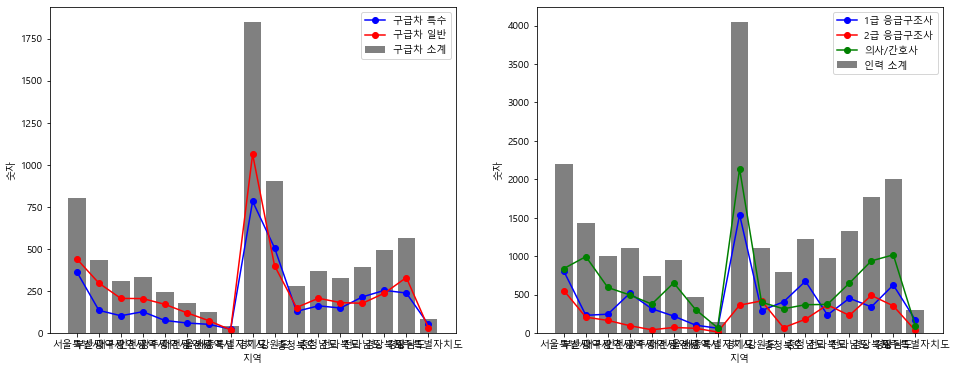

In [132]:
# 전체 없는 버젼
fig, axes = plt.subplots(1, 2, figsize=(16,6))

axes[0].bar(x=ambul_nosum['지역별'], height=ambul_nosum['구급차 소계'], color='grey', label='구급차 소계')
axes[0].plot(ambul_nosum['지역별'], ambul_nosum['구급차 특수'], marker='o', color='blue', label='구급차 특수')
axes[0].plot(ambul_nosum['지역별'], ambul_nosum['구급차 일반'], marker='o', color='red', label='구급차 일반')
# axes[0].plot(ambul_nosum['지역별'], ambul_nosum['인구별 구급차수'], marker='o', color='yellow', label='인구별 구급차수')
# axes[0].plot(data['지역별'], data['인구']/40000, marker='o', color='black', label='인구')
axes[0].set_xlabel('지역')
axes[0].set_ylabel('숫자')
axes[0].legend(loc='upper right')

axes[1].bar(x=medic_nosum['지역별'], height=medic_nosum['인력 소계'], color='grey', label='인력 소계')
axes[1].plot(medic_nosum['지역별'], medic_nosum['1급 응급구조사'], marker='o', color='blue', label='1급 응급구조사')
axes[1].plot(medic_nosum['지역별'], medic_nosum['2급 응급구조사'], marker='o', color='red', label='2급 응급구조사')
axes[1].plot(medic_nosum['지역별'], medic_nosum['의사/간호사'], marker='o', color='green', label='의사/간호사')
# axes[1].plot(medic_nosum['지역별'], medic_nosum['인구별 의료인력수'], marker='o', color='yellow', label='인구별 의료인력수')
axes[1].set_xlabel('지역')
axes[1].set_ylabel('숫자')
axes[1].legend(loc='upper right')



Text(0, 0.5, '비율')

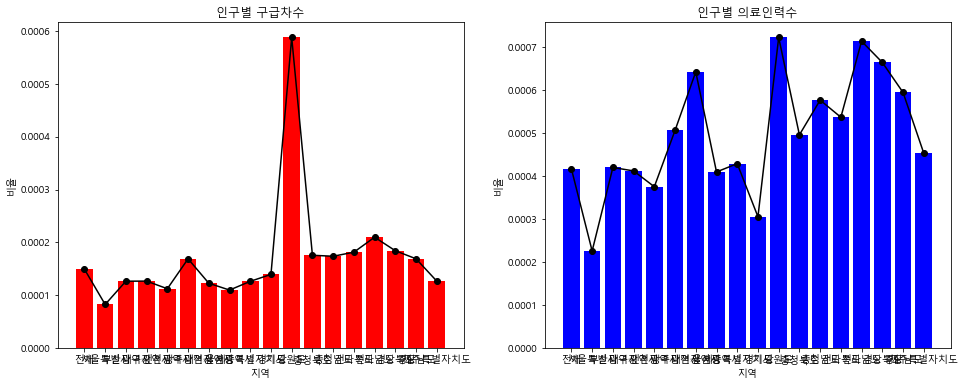

In [133]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))
axes[0].set_title("인구별 구급차수")
axes[0].plot(ambul['지역별'], ambul['인구별 구급차수'], marker='o', color='black')
axes[0].bar(data = ambul, x='지역별', height = "인구별 구급차수", color='red')
axes[0].set_xlabel('지역')
axes[0].set_ylabel('비율')

axes[1].set_title("인구별 의료인력수")
axes[1].plot(medic['지역별'], medic['인구별 의료인력수'], marker='o', color='black')
axes[1].bar(data = medic, x='지역별', height = "인구별 의료인력수", color='blue')
axes[1].set_xlabel('지역')
axes[1].set_ylabel('비율')


In [134]:
# 메인페이지에 들어가는 점수화, 호버 부분
import scipy.stats as ss
ambul_list = ambul_nosum["인구별 구급차수"]
ambul_nosum["정규분포화"] = ss.zscore(ambul_list)
ambul_nosum['밀도'] = ss.norm.cdf(ambul_nosum['정규분포화'])
ambul_nosum['점수'] = (ambul_nosum['밀도']*50).astype(int)

medic_list = medic_nosum["인구별 의료인력수"]
medic_nosum["정규분포화"] = ss.zscore(medic_list)
medic_nosum['밀도'] = ss.norm.cdf(medic_nosum['정규분포화'])
medic_nosum['점수'] = (medic_nosum['밀도']*50).astype(int)

# print(ambul_nosum)
# print(medic_nosum)

data_score = ambul_nosum[["지역별"]]
data_score["점수"] = ambul_nosum["점수"] + medic_nosum["점수"]
# print(data_score)

hover = []
for i in data_score["점수"]:
    hover.append((i-50)*2)
# print(hover)

data_score["호버"] = hover

print(data_score)

        지역별  점수  호버
1     서울특별시  11 -78
2     부산광역시  30 -40
3     대구광역시  29 -42
4     인천광역시  23 -54
5     광주광역시  50   0
6     대전광역시  58  16
7     울산광역시  26 -48
8   세종특별자치시  31 -38
9       경기도  22 -56
10      강원도  96  92
11     충청북도  49  -2
12     충청남도  60  20
13     전라북도  56  12
14     전라남도  78  56
15     경상북도  71  42
16     경상남도  61  22
17  제주특별자치도  34 -32


In [141]:
# 메인페이지 데이터 만들어주는 부분
locations = ["서울특별시","부산광역시","대구광역시","인천광역시","광주광역시",
             "대전광역시","울산광역시","세종특별자치시",
             "경기도","강원도","충청북도","충청남도","전라북도",
             "전라남도","경상북도","경상남도","제주특별자치도"]
metro = ["서울특별시","부산광역시","대구광역시","인천광역시","광주광역시",
             "대전광역시","울산광역시","세종특별자치시"]
suburb = ["경기도","강원도","충청북도","충청남도","전라북도",
             "전라남도","경상북도","경상남도","제주특별자치도"]


main_page_result = []
for location in locations:
    score = int(data_score[data_score["지역별"] == location]["점수"])
    hover = int(data_score[data_score["지역별"] == location]["호버"])
    temp = {
        "name" : location,
        "score" : score,
        "hover" : hover
    }
    main_page_result.append(temp)
        
# print(main_page_result)

In [142]:
# 메인페이지 json 만들어주는 부분

with open('main_page.json', 'w', encoding='UTF-8') as file:
    jsonified = json.dumps(main_page_result)
    file.write(jsonified)
    
# 메인페이지 json 확인

with open('main_page.json') as file:
    json_string = file.read()    
    main = json.loads(json_string)

print(main)

[{'name': '서울특별시', 'score': 11, 'hover': -78}, {'name': '부산광역시', 'score': 30, 'hover': -40}, {'name': '대구광역시', 'score': 29, 'hover': -42}, {'name': '인천광역시', 'score': 23, 'hover': -54}, {'name': '광주광역시', 'score': 50, 'hover': 0}, {'name': '대전광역시', 'score': 58, 'hover': 16}, {'name': '울산광역시', 'score': 26, 'hover': -48}, {'name': '세종특별자치시', 'score': 31, 'hover': -38}, {'name': '경기도', 'score': 22, 'hover': -56}, {'name': '강원도', 'score': 96, 'hover': 92}, {'name': '충청북도', 'score': 49, 'hover': -2}, {'name': '충청남도', 'score': 60, 'hover': 20}, {'name': '전라북도', 'score': 56, 'hover': 12}, {'name': '전라남도', 'score': 78, 'hover': 56}, {'name': '경상북도', 'score': 71, 'hover': 42}, {'name': '경상남도', 'score': 61, 'hover': 22}, {'name': '제주특별자치도', 'score': 34, 'hover': -32}]


In [147]:
# 상세페이지 json 데이터 만들어주는 부분

#보내야되는 형태 [{'name': '경기', '시 metro': 843, '도 suburb': 1040},... {'name': '충남', 'metro': 876, 'suburb': 921}, ...]

# print("구급차의 전체평균: ", ambul_average)
# print("구급차의 시평균: ", ambul_si_average)
# print("구급차의 도평균: ", ambul_do_average)

ambul_medic_result = []
for location in locations:
    temp = float(ambul_nosum[ambul_nosum["지역별"] == location]["인구별 구급차수"])
    if location in metro:
        final_temp = {
            "type" : "인구별 구급차수",
            "name" : location,
            "metro" : temp,
            "suburb" : 0.,
            "total_avg" : ambul_average,
            "metro_avg" : ambul_si_average,
            "suburb_avg" : ambul_do_average
        }
        ambul_medic_result.append(final_temp)
    else:
        final_temp = {
            "type" : "인구별 구급차수",
            "name" : location,
            "metro" : 0.,
            "suburb" : temp,
            "total_avg" : ambul_average,
            "metro_avg" : ambul_si_average,
            "suburb_avg" : ambul_do_average
        }
        ambul_medic_result.append(final_temp)

# print(ambul_result)

# print("의료인력의 전체평균: ", medic_average)
# print("의료인력의 시평균: ", medic_si_average)
# print("의료인력의 도평균: ", medic_do_average)

for location in locations:
    temp = float(medic_nosum[medic_nosum["지역별"] == location]["인구별 의료인력수"])
    if location in metro:
        final_temp = {
            "type" : "인구별 의료인력수",
            "name" : location,
            "metro" : temp,
            "suburb" : 0. ,
            "total_avg" : medic_average,
            "metro_avg" : medic_si_average,
            "suburb_avg" : medic_do_average
        }
        ambul_medic_result.append(final_temp)
    else:
        final_temp = {
            "type" : "인구별 의료인력수",
            "name" : location,
            "metro" : 0.,
            "suburb" : temp,
            "total_avg" : medic_average,
            "metro_avg" : medic_si_average,
            "suburb_avg" : medic_do_average
        }
        ambul_medic_result.append(final_temp)
        
print(ambul_medic_result)

[{'type': '인구별 구급차수', 'name': '서울특별시', 'metro': 8.25358380784588e-05, 'suburb': 0.0, 'total_avg': 0.0001492771600679894, 'metro_avg': 0.0001076751800477543, 'suburb_avg': 0.00018233468979082183}, {'type': '인구별 구급차수', 'name': '부산광역시', 'metro': 0.00012654367909929021, 'suburb': 0.0, 'total_avg': 0.0001492771600679894, 'metro_avg': 0.0001076751800477543, 'suburb_avg': 0.00018233468979082183}, {'type': '인구별 구급차수', 'name': '대구광역시', 'metro': 0.000126741620594652, 'suburb': 0.0, 'total_avg': 0.0001492771600679894, 'metro_avg': 0.0001076751800477543, 'suburb_avg': 0.00018233468979082183}, {'type': '인구별 구급차수', 'name': '인천광역시', 'metro': 0.00011227496816057755, 'suburb': 0.0, 'total_avg': 0.0001492771600679894, 'metro_avg': 0.0001076751800477543, 'suburb_avg': 0.00018233468979082183}, {'type': '인구별 구급차수', 'name': '광주광역시', 'metro': 0.00016890175410650971, 'suburb': 0.0, 'total_avg': 0.0001492771600679894, 'metro_avg': 0.0001076751800477543, 'suburb_avg': 0.00018233468979082183}, {'type': '인구별 구급차수

In [148]:
# 상세페이지 json 형태로 만들어주는 부분
with open('ambul_medic_detail.json', 'w', encoding='UTF-8') as file:
    jsonified = json.dumps(ambul_medic_result)
    file.write(jsonified)
    

In [149]:
# json 읽어오는 부분
with open('ambul_medic_detail.json') as file:
    json_string = file.read()    
    ambul_medic = json.loads(json_string)
    
print(ambul_medic)

[{'type': '인구별 구급차수', 'name': '서울특별시', 'metro': 8.25358380784588e-05, 'suburb': 0.0, 'total_avg': 0.0001492771600679894, 'metro_avg': 0.0001076751800477543, 'suburb_avg': 0.00018233468979082183}, {'type': '인구별 구급차수', 'name': '부산광역시', 'metro': 0.00012654367909929021, 'suburb': 0.0, 'total_avg': 0.0001492771600679894, 'metro_avg': 0.0001076751800477543, 'suburb_avg': 0.00018233468979082183}, {'type': '인구별 구급차수', 'name': '대구광역시', 'metro': 0.000126741620594652, 'suburb': 0.0, 'total_avg': 0.0001492771600679894, 'metro_avg': 0.0001076751800477543, 'suburb_avg': 0.00018233468979082183}, {'type': '인구별 구급차수', 'name': '인천광역시', 'metro': 0.00011227496816057755, 'suburb': 0.0, 'total_avg': 0.0001492771600679894, 'metro_avg': 0.0001076751800477543, 'suburb_avg': 0.00018233468979082183}, {'type': '인구별 구급차수', 'name': '광주광역시', 'metro': 0.00016890175410650971, 'suburb': 0.0, 'total_avg': 0.0001492771600679894, 'metro_avg': 0.0001076751800477543, 'suburb_avg': 0.00018233468979082183}, {'type': '인구별 구급차수

In [160]:
# # 팀장님 json 읽어오는 부분

# hospital = []

# with open('num_of_doctors_for_detail_page.json') as file:
#     json_string = file.read()    
#     total_hospital = json.loads(json_string)

# for i in total_hospital:
#     i["type"] = "의사수"
#     hospital.append(i)
    
# # with open('general_hospital.json') as file:
# #     json_string = file.read()    
# #     general_hospital = json.loads(json_string)

# # for i in general_hospital:
# #     i["type"] = "종합병원"
# #     hospital.append(i)
    
# # with open('medium_hospital.json') as file:
# #     json_string = file.read()    
# #     medium_hospital = json.loads(json_string)

# # for i in medium_hospital:
# #     i["type"] = "병원"
# #     hospital.append(i)
    
# # with open('small_hospital.json') as file:
# #     json_string = file.read()    
# #     small_hospital = json.loads(json_string)

# # for i in small_hospital:
# #     i["type"] = "의원"
# #     hospital.append(i)
    
# print(hospital)

[{'name': '서울', 'metro': 4.507540752332454, 'suburb': 0.0, 'total_avg': 3.029036453185699, 'metro_avg': 3.391860539634056, 'suburb_avg': 2.2314003992194325, 'type': '의사수'}, {'name': '부산', 'metro': 3.4228139245141285, 'suburb': 0.0, 'total_avg': 3.029036453185699, 'metro_avg': 3.391860539634056, 'suburb_avg': 2.2314003992194325, 'type': '의사수'}, {'name': '대구', 'metro': 3.5243095901082806, 'suburb': 0.0, 'total_avg': 3.029036453185699, 'metro_avg': 3.391860539634056, 'suburb_avg': 2.2314003992194325, 'type': '의사수'}, {'name': '인천', 'metro': 2.5438115989109793, 'suburb': 0.0, 'total_avg': 3.029036453185699, 'metro_avg': 3.391860539634056, 'suburb_avg': 2.2314003992194325, 'type': '의사수'}, {'name': '광주', 'metro': 3.7405297152811396, 'suburb': 0.0, 'total_avg': 3.029036453185699, 'metro_avg': 3.391860539634056, 'suburb_avg': 2.2314003992194325, 'type': '의사수'}, {'name': '대전', 'metro': 3.6218766266679965, 'suburb': 0.0, 'total_avg': 3.029036453185699, 'metro_avg': 3.391860539634056, 'suburb_avg'

In [162]:
# # 팀장님꺼 json 형태로 만들어주는 부분
# with open('num_of_doctors_for_detail_page2.json', 'w', encoding='UTF-8') as file:
#     jsonified = json.dumps(hospital)
#     file.write(jsonified)

In [163]:
# # json 읽어오는 부분
# with open('num_of_doctors_for_detail_page2.json') as file:
#     json_string = file.read()    
#     ambul_medic = json.loads(json_string)
    
# print(ambul_medic)

[{'name': '서울', 'metro': 4.507540752332454, 'suburb': 0.0, 'total_avg': 3.029036453185699, 'metro_avg': 3.391860539634056, 'suburb_avg': 2.2314003992194325, 'type': '의사수'}, {'name': '부산', 'metro': 3.4228139245141285, 'suburb': 0.0, 'total_avg': 3.029036453185699, 'metro_avg': 3.391860539634056, 'suburb_avg': 2.2314003992194325, 'type': '의사수'}, {'name': '대구', 'metro': 3.5243095901082806, 'suburb': 0.0, 'total_avg': 3.029036453185699, 'metro_avg': 3.391860539634056, 'suburb_avg': 2.2314003992194325, 'type': '의사수'}, {'name': '인천', 'metro': 2.5438115989109793, 'suburb': 0.0, 'total_avg': 3.029036453185699, 'metro_avg': 3.391860539634056, 'suburb_avg': 2.2314003992194325, 'type': '의사수'}, {'name': '광주', 'metro': 3.7405297152811396, 'suburb': 0.0, 'total_avg': 3.029036453185699, 'metro_avg': 3.391860539634056, 'suburb_avg': 2.2314003992194325, 'type': '의사수'}, {'name': '대전', 'metro': 3.6218766266679965, 'suburb': 0.0, 'total_avg': 3.029036453185699, 'metro_avg': 3.391860539634056, 'suburb_avg'